In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import GRO, XTC
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tqdm.auto import tqdm
#import MDAnalysis

In [2]:
u = mda.Universe("/Volumes/zhiwendisk/Mac_2023_20231102/Data/2023/CGtoAA/6z0i_CGtoAA_200us_step6_6.gro", "/Volumes/zhiwendisk/Mac_2023_20231102/Data/2023/CGtoAA/6z0i_CGtoAA_200us_300ns_nojump_center.xtc")
protein = u.select_atoms('protein')
print('There are {} residues in the protein'.format(len(protein.residues)))
#protein residues

There are 112 residues in the protein


/opt/homebrew/Caskroom/miniconda/base/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/coordinates/XDR.py:241: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


In [3]:
#Trajectory frames
u_1000 = u.trajectory
len(u_1000)
time=[]
for ts in tqdm(u_1000):
    time.append(u.trajectory.time)
time=np.array(time)
len(time)

  0%|          | 0/6001 [00:00<?, ?it/s]

6001

In [4]:

from numpy.linalg import norm
def theta_NMP(u):
    A = u.select_atoms("resid 20 and (name CA) and (resname ALA)").center_of_geometry()
    B = u.select_atoms("resid 24 and (name CA) and (resname LEU)").center_of_geometry()
    BA= A - B
    C = u.select_atoms("resid 32 and (name CA) and (resname ALA)").center_of_geometry()
    D = u.select_atoms("resid 36 and (name CA) and (resname ALA)").center_of_geometry()
    #DC = C - D
    DC = C - D
    theta = np.arccos(np.dot(BA,DC)/(norm(BA)*norm(DC)))
    return np.rad2deg(theta)
if __name__ == "__main__":
    import MDAnalysis
    from MDAnalysis.tests.datafiles import PSF, DCD
    import matplotlib
    import matplotlib.pyplot as plt
  

In [5]:
'''
from numpy.linalg import norm
def theta_NMP(u):
    A = u.select_atoms("index 1387").center_of_geometry() #24LEU CA index 1368 25ILE CA index 1387
    B = u.select_atoms("index 1406").center_of_geometry() #26LYS CA index 1406 
    BA= A - B
    print(BA)
    C = u.select_atoms("index 1406").center_of_geometry() #26LYS CA index 1406
    D = u.select_atoms("index 1447").center_of_geometry() #28LEU CA index 1447
    DC = C - D
    theta = np.arccos(np.dot(BA,DC)/(norm(BA)*norm(DC)))
    print(np.dot(BA,DC),(norm(BA)*norm(DC)) )
    return np.rad2deg(theta)
if __name__ == "__main__":
    import MDAnalysis
    from MDAnalysis.tests.datafiles import PSF, DCD
    import matplotlib
    import matplotlib.pyplot as plt
'''

'\nfrom numpy.linalg import norm\ndef theta_NMP(u):\n    A = u.select_atoms("index 1387").center_of_geometry() #24LEU CA index 1368 25ILE CA index 1387\n    B = u.select_atoms("index 1406").center_of_geometry() #26LYS CA index 1406 \n    BA= A - B\n    print(BA)\n    C = u.select_atoms("index 1406").center_of_geometry() #26LYS CA index 1406\n    D = u.select_atoms("index 1447").center_of_geometry() #28LEU CA index 1447\n    DC = C - D\n    theta = np.arccos(np.dot(BA,DC)/(norm(BA)*norm(DC)))\n    print(np.dot(BA,DC),(norm(BA)*norm(DC)) )\n    return np.rad2deg(theta)\nif __name__ == "__main__":\n    import MDAnalysis\n    from MDAnalysis.tests.datafiles import PSF, DCD\n    import matplotlib\n    import matplotlib.pyplot as plt\n'

In [6]:
time_ns = np.array(time)/1000

In [7]:
   # u = MDAnalysis.Universe(PSF, DCD)
data = np.array([(u.trajectory.time, theta_NMP(u)) for ts in u.trajectory])
time, NMP = data.T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


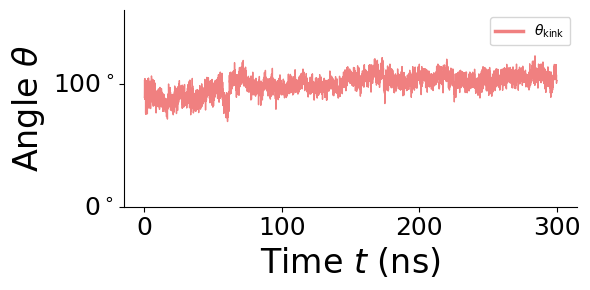

In [8]:
# plotting
degreeFormatter = matplotlib.ticker.FormatStrFormatter(r"%g$^\circ$")
fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot(111)
ax1.plot(time_ns, NMP, lw=1, label=r"$\theta_{\mathrm{kink}}$", color='lightcoral')
ax1.set_xlabel(r"Time $t$ (ns)")
ax1.set_ylabel(r"Angle $\theta$")
plt.ylim([0,160])
ax1.yaxis.set_major_formatter(degreeFormatter)
ax1.legend(loc="best", fontsize=16)

# Increase the font size for x-axis ticks and y-axis ticks
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)

# Increase the font size for x-axis and y-axis labels
ax1.xaxis.label.set_size(24)
ax1.yaxis.label.set_size(24)

leg = plt.legend()
for i in leg.legend_handles:
    i.set_linewidth(2.5)
ax=plt.gca() ##get caurrent axis
ax.spines["right"].set_color("none") #visible for right spines
ax.spines["top"].set_color("none") ##visible for top spines
plt.subplots_adjust(bottom=0.15)

plt.tight_layout()

plt.savefig("/Users/k20098771/Data/Figures/6z0i_AA_chainA_probobility_plot.eps",dpi=800, format='eps')

In [9]:
np.average(NMP[0:6001])

99.81205112032494

In [10]:
np.std(NMP[0:6001])/np.sqrt(6001)

0.10067842206330017

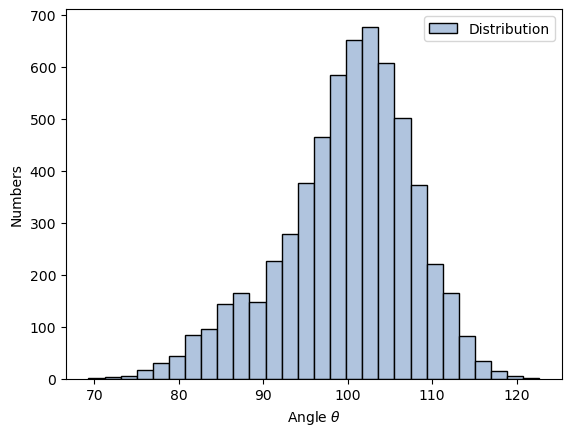

In [11]:
#plot distribution
stat = plt.hist(NMP, color = 'lightsteelblue', edgecolor = 'black', bins = 28, label='Distribution')
plt.xlabel(r"Angle $\theta$")
plt.ylabel('Numbers')
#plt.xlim([5,15])
#plt.ylim([-2,8000])
plt.legend(loc='best')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


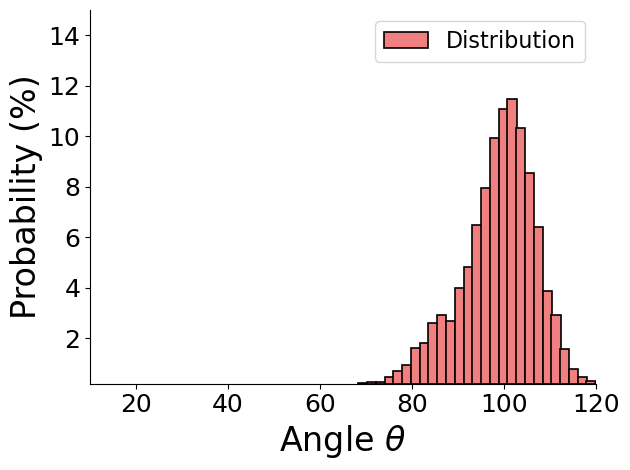

In [12]:
#plot normalisation
new = stat[0]/np.sum(stat[0])*100
newx = stat[1]
newxx = newx[:-1]
plt.bar(newxx, new, width=2, bottom=0.20, align='center', data=None, color= 'lightcoral',linewidth=1.2, edgecolor = 'black', label='Distribution')
plt.xlabel(r"Angle $\theta$", fontsize=24)
plt.ylabel('Probability (%)', fontsize=24)
plt.xlim([10,120])
plt.ylim([0.2,15])
plt.legend(loc='best', fontsize=16)
ax=plt.gca() ##get caurrent axis
ax.spines["right"].set_color("none") #visible for right spines
ax.spines["top"].set_color("none") ##visible for top spines

# Increase the font size for x-axis ticks
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()

plt.savefig("/Users/k20098771/Data/Figures/6z0i_AA_chainA_probobility_plot_01.eps",dpi=800, format='eps')